In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import interp
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn import metrics, model_selection
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression


from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, confusion_matrix, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier,RadiusNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC,SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score,roc_auc_score



from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

import matplotlib
from IPython.display import display, HTML


%matplotlib inline

In [2]:

df = pd.read_csv('churn2.csv')
df.head(5)



,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
df = df.drop(['phone number'],axis=1)
df.shape

(3333, 20)

In [4]:
df.isnull().sum()

state                     0
account length            0
area code                 0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [5]:

df['churn'].value_counts()
df.dtypes

state                      object
account length              int64
area code                   int64
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

In [6]:
print("------  Data Types  ----- \n",df.dtypes)
print("------  Data type Count  ----- \n",df.dtypes.value_counts())

------  Data Types  ----- 
 state                      object
account length              int64
area code                   int64
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object
------  Data type Count  ----- 
 float64    8
int64      8
object     3
bool       1
dtype: int64


In [7]:
df['churn'] = df['churn']*1 




from sklearn.utils import resample
# Separate majority and minority classes
df_majority = df[df.churn==0]
df_minority = df[df.churn==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=2000,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df= pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts

df.churn.value_counts()
# 1    576

df.head(10)


,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
5,AL,118,510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0
6,MA,121,510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0
7,MO,147,415,yes,no,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,0
8,LA,117,408,no,no,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0
9,WV,141,415,yes,yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0


In [8]:
cate = [key for key in dict(df.dtypes) if dict(df.dtypes)[key] in ['bool', 'object']]

In [9]:
le = preprocessing.LabelEncoder()
for i in cate:
    le.fit(df[i])
    df[i] = le.transform(df[i])
    

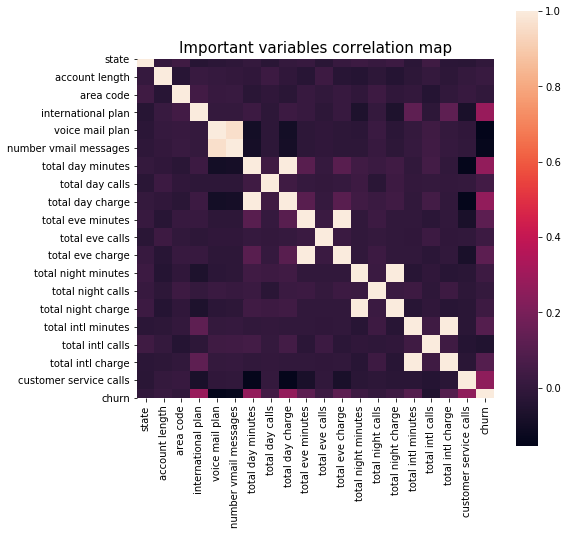

In [10]:
corrmat = df.corr(method='pearson')
f, ax = plt.subplots(figsize=(8, 8))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=1., square=True)
plt.title("Important variables correlation map", fontsize=15)
plt.show()

In [11]:
y = df['churn']
df =df = df.drop(['churn'],axis=1)

In [12]:
xtrain, xvalid, ytrain, yvalid = train_test_split(df, y, 
                                                  stratify=y, 
                                                  random_state=42, 
                                                  test_size=0.1, shuffle=True)


In [13]:
print(xtrain.shape, xvalid.shape, ytrain.shape, yvalid.shape)

(4365, 19) (485, 19) (4365,) (485,)


In [14]:
clf = LogisticRegression(C=1.0)
clf.fit(xtrain, ytrain)
predictions = clf.predict(xvalid)
print("accuracy_score",accuracy_score(yvalid, predictions))
print("auc",roc_auc_score(yvalid, predictions))
lr = [clf.__class__,accuracy_score(yvalid, predictions),roc_auc_score(yvalid, predictions)]

accuracy_score 0.7731958762886598
auc 0.7652631578947369


C:\Users\Marium Baig\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [15]:
algo = pd.DataFrame([lr])

In [16]:
clf = MultinomialNB() # naiveBayes
clf.fit(xtrain, ytrain)
predictions = clf.predict(xvalid)
print("accuracy_score",accuracy_score(yvalid, predictions))
print("auc",roc_auc_score(yvalid, predictions))
mnb = [clf.__class__,accuracy_score(yvalid, predictions),roc_auc_score(yvalid, predictions)]

accuracy_score 0.5958762886597938
auc 0.589780701754386


In [17]:
algo = algo.append([mnb])

In [18]:
clf = AdaBoostClassifier(n_estimators=1)
clf.fit(xtrain, ytrain)
predictions = clf.predict(xvalid)
print("accuracy_score",accuracy_score(yvalid, predictions))
print("auc",roc_auc_score(yvalid, predictions))
abc = [clf.__class__,accuracy_score(yvalid, predictions),roc_auc_score(yvalid, predictions)]

accuracy_score 0.668041237113402
auc 0.616140350877193


In [19]:
algo = algo.append([abc])

In [20]:
clf = KNeighborsClassifier(10)
#default gave the best of 88
# n=2  gives 86 & n=10 gives 87 thats close
clf.fit(xtrain, ytrain)
predictions = clf.predict(xvalid)
print("accuracy_score",accuracy_score(yvalid, predictions))
print("auc",roc_auc_score(yvalid, predictions))
knc = [clf.__class__,accuracy_score(yvalid, predictions),roc_auc_score(yvalid, predictions)]

accuracy_score 0.7257731958762886
auc 0.7107456140350877


In [21]:
algo = algo.append([knc])

In [22]:
clf = GradientBoostingClassifier()
# default gave the best output
# n_estimators=51, learning_rate=0.1, max_features=None, max_depth=4, random_state=0 gave the second best
clf.fit(xtrain, ytrain)
predictions = clf.predict(xvalid)
print("accuracy_score",accuracy_score(yvalid, predictions))
print("auc",roc_auc_score(yvalid, predictions))
gbc = [clf.__class__,accuracy_score(yvalid, predictions),roc_auc_score(yvalid, predictions)]

accuracy_score 0.8948453608247423
auc 0.8851754385964913


In [23]:
algo = algo.append([gbc])

In [24]:
clf = DecisionTreeClassifier()
clf.fit(xtrain, ytrain)
predictions = clf.predict(xvalid)
print("accuracy_score",accuracy_score(yvalid, predictions))
print("auc",roc_auc_score(yvalid, predictions))
dtc = [clf.__class__,accuracy_score(yvalid, predictions),roc_auc_score(yvalid, predictions)]

accuracy_score 0.954639175257732
auc 0.9606578947368422


In [25]:
algo = algo.append([dtc])

In [26]:
 clf=RandomForestClassifier(n_estimators=500,bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
clf.fit(xtrain, ytrain)
predictions = clf.predict(xvalid)
print("accuracy_score",accuracy_score(yvalid, predictions))
print("auc",roc_auc_score(yvalid, predictions))
RFC = [clf.__class__,accuracy_score(yvalid, predictions),roc_auc_score(yvalid, predictions)]

accuracy_score 0.979381443298969
auc 0.9817105263157896


In [27]:
algo = algo.append([RFC])

In [28]:
algo.sort_values([1], ascending=[False])

,0,1,2
0,<class 'sklearn.ensemble.forest.RandomForestCl...,0.979381,0.981711
0,<class 'sklearn.tree.tree.DecisionTreeClassifi...,0.954639,0.960658
0,<class 'sklearn.ensemble.gradient_boosting.Gra...,0.894845,0.885175
0,<class 'sklearn.linear_model.logistic.Logistic...,0.773196,0.765263
0,<class 'sklearn.neighbors.classification.KNeig...,0.725773,0.710746
0,<class 'sklearn.ensemble.weight_boosting.AdaBo...,0.668041,0.616140
0,<class 'sklearn.naive_bayes.MultinomialNB'>,0.595876,0.589781


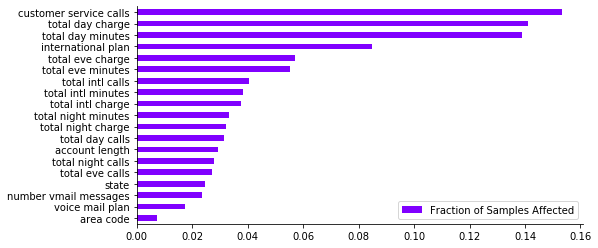

In [29]:
# plot the feature importance
feat_scores = pd.DataFrame(
    {
        'Fraction of Samples Affected': clf.feature_importances_
    },
    index=df.columns)
feat_scores = feat_scores.sort_values(by='Fraction of Samples Affected')
feat_scores.plot(kind='barh', figsize=(8, 4), colormap='rainbow')
sns.despine()

In [30]:


X_train, X_test, y_train, y_test = train_test_split(
    df, y, shuffle=True, test_size=0.2, random_state=15)

# fit Model

model = RandomForestClassifier(n_estimators=500,bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False).fit(X_train, y_train.values.ravel())

# R^2 - the best R² possible score is 1.0
print("R²: ", model.score(X_test, y_test))
predictions = model.predict(X_test)
mse = mean_squared_error(y_test.values.ravel(), predictions)
rmse = np.sqrt(mse)
print("rmse: ", rmse)

R²:  0.988659793814433
rmse:  0.10649040419477715


In [31]:


X_train, X_test, y_train, y_test = train_test_split(
    df, y, shuffle=True, test_size=0.2, random_state=15)

# fit Model

model = GradientBoostingClassifier().fit(X_train, y_train.values.ravel())

# R^2 - the best R² possible score is 1.0
print("R²: ", model.score(X_test, y_test))
predictions = model.predict(X_test)
mse = mean_squared_error(y_test.values.ravel(), predictions)
rmse = np.sqrt(mse)
print("rmse: ", rmse)

R²:  0.9123711340206185
rmse:  0.2960217322754893


In [32]:
df.head(2)
df = df.drop(['total eve charge'],axis=1)

In [33]:

df = df.drop(['total day charge'],axis=1)

df = df.drop(['total night charge'],axis=1)

df = df.drop(['total intl charge'],axis=1)

df.head(2)


,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls
0,16,128,415,0,1,25,265.1,110,197.4,99,244.7,91,10.0,3,1
1,35,107,415,0,1,26,161.6,123,195.5,103,254.4,103,13.7,3,1


In [34]:
xtrain, xvalid, ytrain, yvalid = train_test_split(df, y, 
                                                  stratify=y, 
                                                  random_state=42, 
                                                  test_size=0.1, shuffle=True)


In [35]:
 clf=RandomForestClassifier(n_estimators=500,bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
clf.fit(xtrain, ytrain)
predictions = clf.predict(xvalid)
print("accuracy_score",accuracy_score(yvalid, predictions))
print("auc",roc_auc_score(yvalid, predictions))
RFC = [clf.__class__,accuracy_score(yvalid, predictions),roc_auc_score(yvalid, predictions)]

accuracy_score 0.979381443298969
auc 0.9817105263157896


In [36]:
clf = GradientBoostingClassifier()
# default gave the best output
# n_estimators=51, learning_rate=0.1, max_features=None, max_depth=4, random_state=0 gave the second best
clf.fit(xtrain, ytrain)
predictions = clf.predict(xvalid)
print("accuracy_score",accuracy_score(yvalid, predictions))
print("auc",roc_auc_score(yvalid, predictions))
gbc = [clf.__class__,accuracy_score(yvalid, predictions),roc_auc_score(yvalid, predictions)]

accuracy_score 0.8948453608247423
auc 0.8851754385964913


In [37]:
clf = KNeighborsClassifier(10)
#default gave the best of 88
# n=2  gives 86 & n=10 gives 87 thats close
clf.fit(xtrain, ytrain)
predictions = clf.predict(xvalid)
print("accuracy_score",accuracy_score(yvalid, predictions))
print("auc",roc_auc_score(yvalid, predictions))
knc = [clf.__class__,accuracy_score(yvalid, predictions),roc_auc_score(yvalid, predictions)]

accuracy_score 0.7278350515463917
auc 0.7132456140350878


In [38]:
clf = AdaBoostClassifier(n_estimators=275)
clf.fit(xtrain, ytrain)
predictions = clf.predict(xvalid)
print("accuracy_score",accuracy_score(yvalid, predictions))
print("auc",roc_auc_score(yvalid, predictions))
abc = [clf.__class__,accuracy_score(yvalid, predictions),roc_auc_score(yvalid, predictions)]

accuracy_score 0.8329896907216495
auc 0.8280701754385965


In [39]:
clf = LogisticRegression(C=1.0)
clf.fit(xtrain, ytrain)
predictions = clf.predict(xvalid)
print("accuracy_score",accuracy_score(yvalid, predictions))
print("auc",roc_auc_score(yvalid, predictions))
lr = [clf.__class__,accuracy_score(yvalid, predictions),roc_auc_score(yvalid, predictions)]

accuracy_score 0.7731958762886598
auc 0.7652631578947369


C:\Users\Marium Baig\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [40]:
clf = DecisionTreeClassifier()
clf.fit(xtrain, ytrain)
predictions = clf.predict(xvalid)
print("accuracy_score",accuracy_score(yvalid, predictions))
print("auc",roc_auc_score(yvalid, predictions))
dtc = [clf.__class__,accuracy_score(yvalid, predictions),roc_auc_score(yvalid, predictions)]

accuracy_score 0.954639175257732
auc 0.9606578947368422


In [41]:
clf = MultinomialNB() # naiveBayes
clf.fit(xtrain, ytrain)
predictions = clf.predict(xvalid)
print("accuracy_score",accuracy_score(yvalid, predictions))
print("auc",roc_auc_score(yvalid, predictions))
mnb = [clf.__class__,accuracy_score(yvalid, predictions),roc_auc_score(yvalid, predictions)]

accuracy_score 0.5958762886597938
auc 0.5927631578947369


In [42]:
algo2 = pd.DataFrame([lr])
algo2 = algo2.append([dtc])
algo2 = algo2.append([mnb])

algo2 = algo2.append([abc])
algo2 = algo2.append([knc])

algo2 = algo2.append([gbc])
algo2 = algo2.append([RFC])
algo2.sort_values([1], ascending=[False])

,0,1,2
0,<class 'sklearn.ensemble.forest.RandomForestCl...,0.979381,0.981711
0,<class 'sklearn.tree.tree.DecisionTreeClassifi...,0.954639,0.960658
0,<class 'sklearn.ensemble.gradient_boosting.Gra...,0.894845,0.885175
0,<class 'sklearn.ensemble.weight_boosting.AdaBo...,0.832990,0.828070
0,<class 'sklearn.linear_model.logistic.Logistic...,0.773196,0.765263
0,<class 'sklearn.neighbors.classification.KNeig...,0.727835,0.713246
0,<class 'sklearn.naive_bayes.MultinomialNB'>,0.595876,0.592763
